In [1]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import glob
from shutil import copyfile

%matplotlib inline

In [2]:
#df = pd.read_pickle("segment_data_native.pkl")
df = pd.concat(pd.read_pickle(x) for x in glob.glob("segment_data_*.pkl"))
print(df.shape)

(6286, 37)


In [19]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df.loc[(df["scaffold"] == "A") & (df["template"]=="b") & (df["loop number"] == "0059")])

   template scaffold loop number loop secondary structure  \
73        b        A        0059  LLLLLLLLLLLHHHHHHHHHLLL   

          loop abego string loop length loop start position loop end position  \
73  BBBBBAAAGBBAAAAAAAAAABB          23                  36                58   

   protein length  fraction of L residues  fraction of H residues  \
73            145                0.608696                0.391304   

    fraction of E residues longest stretch of L residues  \
73                0.391304                   LLLLLLLLLLL   

    long range backbone hydrogen bond energy  \
73                                       0.0   

    short range backbone hydrogen bond energy  backbone clashes (vdw)  \
73                                  -8.136854                0.349046   

    RMSD to scaffold PDB                             Atoms at 8A from metal  \
73              17.47563  N_38_A,CA_38_A,C_38_A,O_38_A,N_39_A,CA_39_A,CB...   

                               Atoms at 9A from met

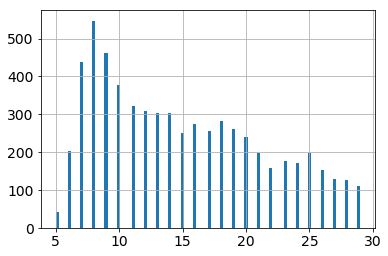

In [3]:
df["loop length"].hist(bins=100)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)

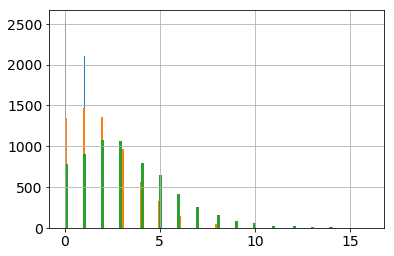

In [12]:
df["Number CB contacts at 8A"].hist(bins=100)
df["Number of CB contacts at 10A"].hist(bins=100)
df["Number of CB contacts at 12A"].hist(bins=100)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)

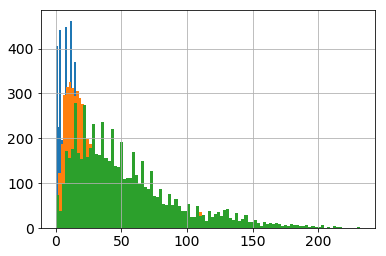

In [13]:
df["Number atoms at 8A"].hist(bins=100)
df["Number atoms at 10A"].hist(bins=100)
df["Number atoms at 12A"].hist(bins=100)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)

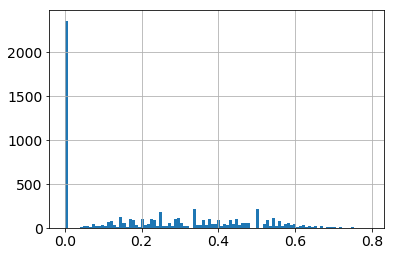

In [15]:
df["fraction of E residues"].hist(bins=100)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)

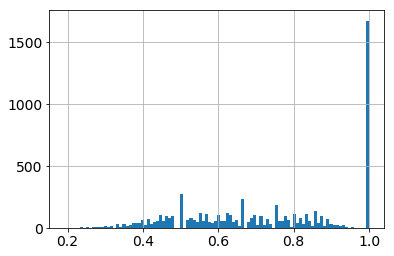

In [5]:
df["fraction of L residues"].hist(bins=100)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)

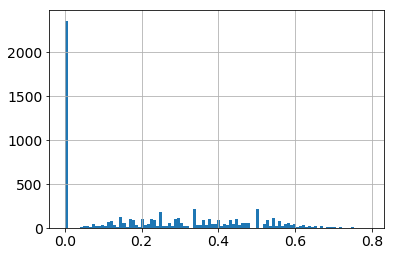

In [16]:
df["fraction of H residues"].hist(bins=100)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)

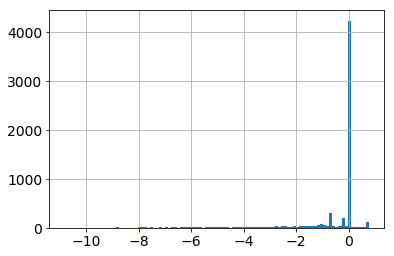

In [17]:
df["long range backbone hydrogen bond energy"].hist(bins=100)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)

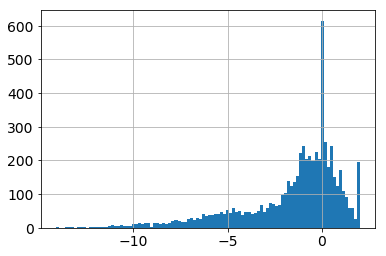

In [18]:
df["short range backbone hydrogen bond energy"].hist(bins=100)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)

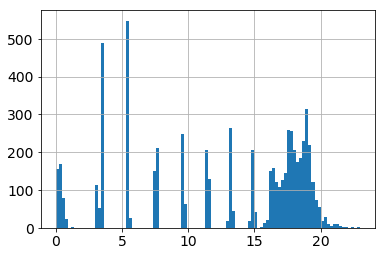

In [19]:
df["RMSD to scaffold PDB"].hist(bins=100)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)

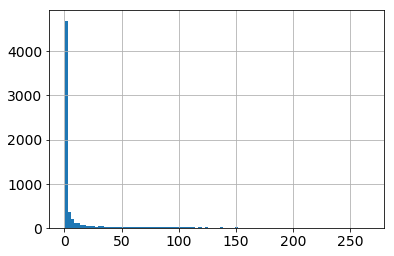

In [20]:
df["backbone clashes (vdw)"].hist(bins=100)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)

In [8]:
df["len longest loop stretch"] = df["longest stretch of L residues"].str.len()

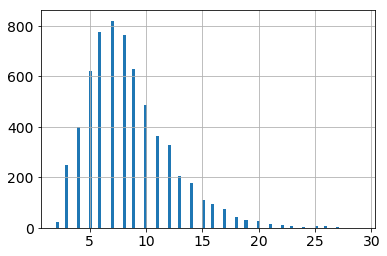

In [26]:
df["len longest loop stretch"].hist(bins=100)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)

In [9]:
df_diff = df.loc[df["RMSD to scaffold PDB"]>3.0]
print(df_diff.shape)

(5859, 38)


In [11]:
 print(df_diff.loc[(df_diff["scaffold"] == "A") & (df_diff["template"]=="b") & (df_diff["loop number"] == "0059")])

   template scaffold loop number loop secondary structure  \
73        b        A        0059  LLLLLLLLLLLHHHHHHHHHLLL   

          loop abego string loop length loop start position loop end position  \
73  BBBBBAAAGBBAAAAAAAAAABB          23                  36                58   

   protein length  fraction of L residues           ...             \
73            145                0.608696           ...              

    CB contacts at 9A  CB contacts at 10A CB contacts at 11A  \
73                40C         40C,42C,43C    53A,40C,42C,43C   

         CB contacts at 12A  Number CB contacts at 8A  \
73  43A,53A,87A,40C,42C,43C                         1   

    Number of CB contacts at 9A  Number of CB contacts at 10A  \
73                            1                             3   

   Number of CB contacts at 11A Number of CB contacts at 12A  \
73                            4                            6   

   len longest loop stretch  
73                       11  

[1 rows 

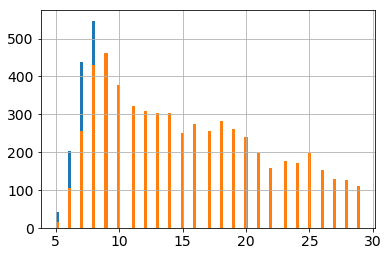

In [40]:
df["loop length"].hist(bins=100)
df_diff["loop length"].hist(bins=100)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)

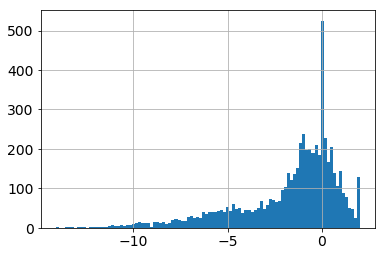

In [42]:
df_diff["short range backbone hydrogen bond energy"].hist(bins=100)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)

In [28]:
df_ordered = df_diff.loc[((df_diff["short range backbone hydrogen bond energy"]<=-1.0) | (df_diff["long range backbone hydrogen bond energy"]<=-0.5)) & (df_diff["len longest loop stretch"]<= 13.0)]
print(df_ordered.shape)

(3064, 38)


In [24]:
 print(df_ordered.loc[(df_ordered["scaffold"] == "A") & (df_ordered["template"]=="b") & (df_ordered["loop number"] == "0059")])

   template scaffold loop number loop secondary structure  \
73        b        A        0059  LLLLLLLLLLLHHHHHHHHHLLL   

          loop abego string loop length loop start position loop end position  \
73  BBBBBAAAGBBAAAAAAAAAABB          23                  36                58   

   protein length  fraction of L residues           ...             \
73            145                0.608696           ...              

    CB contacts at 9A  CB contacts at 10A CB contacts at 11A  \
73                40C         40C,42C,43C    53A,40C,42C,43C   

         CB contacts at 12A  Number CB contacts at 8A  \
73  43A,53A,87A,40C,42C,43C                         1   

    Number of CB contacts at 9A  Number of CB contacts at 10A  \
73                            1                             3   

   Number of CB contacts at 11A Number of CB contacts at 12A  \
73                            4                            6   

   len longest loop stretch  
73                       11  

[1 rows 

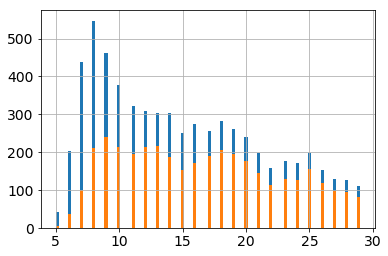

In [65]:
df["loop length"].hist(bins=100)
df_ordered["loop length"].hist(bins=100)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)

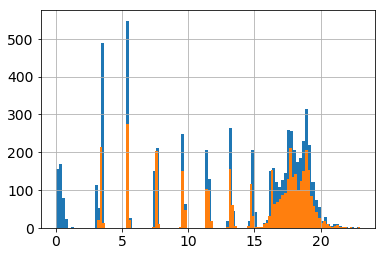

In [66]:
df["RMSD to scaffold PDB"].hist(bins=100)
df_ordered["RMSD to scaffold PDB"].hist(bins=100)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)

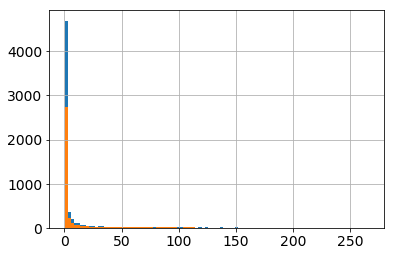

In [67]:
df["backbone clashes (vdw)"].hist(bins=100)
df_ordered["backbone clashes (vdw)"].hist(bins=100)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)

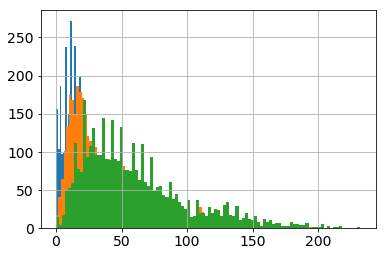

In [68]:
df_ordered["Number atoms at 8A"].hist(bins=100)
df_ordered["Number atoms at 10A"].hist(bins=100)
df_ordered["Number atoms at 12A"].hist(bins=100)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)

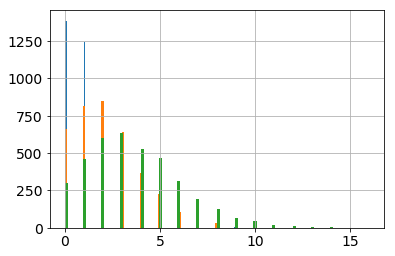

In [69]:
df_ordered["Number CB contacts at 8A"].hist(bins=100)
df_ordered["Number of CB contacts at 10A"].hist(bins=100)
df_ordered["Number of CB contacts at 12A"].hist(bins=100)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)

In [29]:
df_contacts = df_ordered.loc[(df_ordered["Number of CB contacts at 11A"]>2.0) & (df_ordered["Number atoms at 11A"]>=20.0)]
print(df_contacts.shape)

(1708, 38)


In [32]:
 print(df_contacts.loc[(df_contacts["scaffold"] == "A") & (df_contacts["template"]=="b") & (df_contacts["loop number"] == "0018")])

Empty DataFrame
Columns: [template, scaffold, loop number, loop secondary structure, loop abego string, loop length, loop start position, loop end position, protein length, fraction of L residues, fraction of H residues, fraction of E residues, longest stretch of L residues, long range backbone hydrogen bond energy, short range backbone hydrogen bond energy, backbone clashes (vdw), RMSD to scaffold PDB, Atoms at 8A from metal, Atoms at 9A from metal, Atoms at 10A from metal, Atoms at 11A from metal, Atoms at 12A from metal, Number atoms at 8A, Number atoms at 9A, Number atoms at 10A, Number atoms at 11A, Number atoms at 12A, CB contacts at 8A, CB contacts at 9A, CB contacts at 10A, CB contacts at 11A, CB contacts at 12A, Number CB contacts at 8A, Number of CB contacts at 9A, Number of CB contacts at 10A, Number of CB contacts at 11A, Number of CB contacts at 12A, len longest loop stretch]
Index: []

[0 rows x 38 columns]


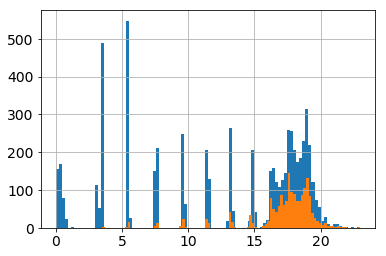

In [33]:
df["RMSD to scaffold PDB"].hist(bins=100)
df_contacts["RMSD to scaffold PDB"].hist(bins=100)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)

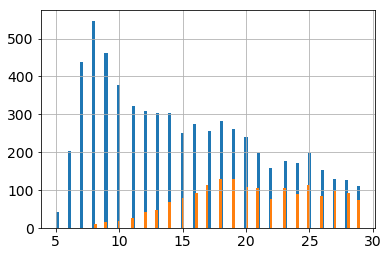

In [34]:
df["loop length"].hist(bins=100)
df_contacts["loop length"].hist(bins=100)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)

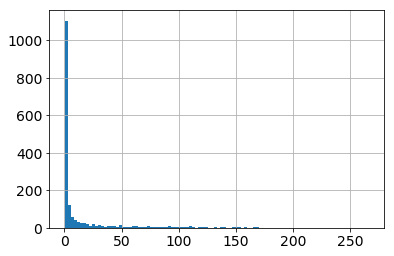

In [35]:
#df["backbone clashes (vdw)"].hist(bins=100)
df_contacts["backbone clashes (vdw)"].hist(bins=100)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)

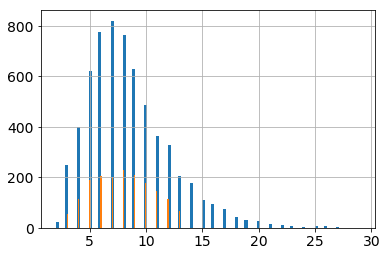

In [36]:
df["len longest loop stretch"].hist(bins=100)
df_contacts["len longest loop stretch"].hist(bins=100)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)

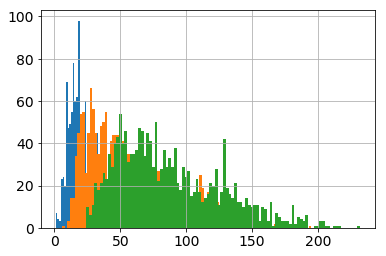

In [37]:
df_contacts["Number atoms at 8A"].hist(bins=100)
df_contacts["Number atoms at 10A"].hist(bins=100)
df_contacts["Number atoms at 12A"].hist(bins=100)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)

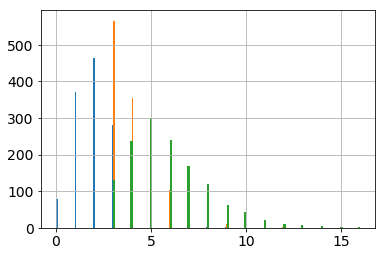

In [75]:
df_contacts["Number CB contacts at 8A"].hist(bins=100)
df_contacts["Number of CB contacts at 10A"].hist(bins=100)
df_contacts["Number of CB contacts at 12A"].hist(bins=100)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)

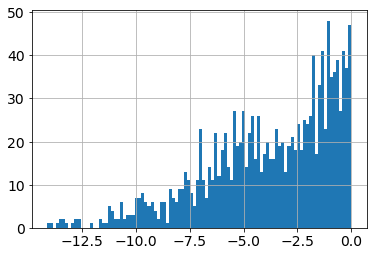

In [74]:
df_contacts["short range backbone hydrogen bond energy"].hist(bins=100)

plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)

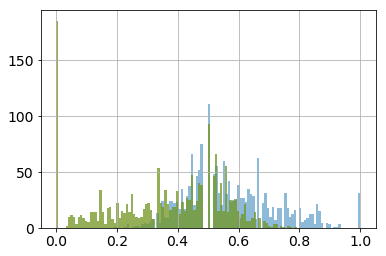

In [38]:
df_contacts["fraction of L residues"].hist(bins=100, alpha=0.5)
df_contacts["fraction of H residues"].hist(bins=100, alpha=0.5)
df_contacts["fraction of E residues"].hist(bins=100, alpha=0.5)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)

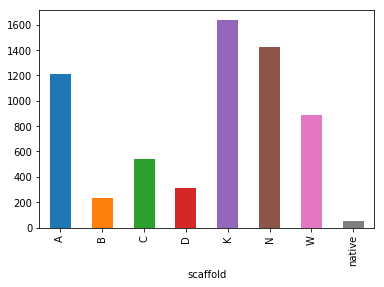

In [39]:
groups = df.groupby(['scaffold']).size()
groups.plot.bar()

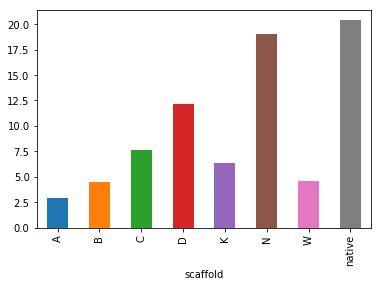

In [40]:
groups = df.groupby(['scaffold'])["backbone clashes (vdw)"].mean()
groups.plot.bar()

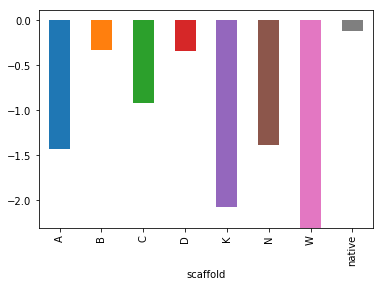

In [41]:
groups = df.groupby(['scaffold'])["short range backbone hydrogen bond energy"].mean()
groups.plot.bar()

In [80]:
print(df_contacts)

     template scaffold loop number       loop secondary structure  \
24          d   native        0008       LLLLLLHHHHHHHHHHLLLLLLLL   
25          d   native        0009         LLLLLLLLLHHHLLLHHHLLLL   
26          d   native        0010         LLLLEELLLLLLLLLLEELLLL   
11          a        B        0012                  LLEELLLLEELLL   
18          b        B        0007    LLLLLEEEEELLLEEEEELLHHHHHHH   
19          b        B        0008                LLELHHHLLLEHHHL   
22          b        B        0011       LLLEEEELLLLLLEEEEELLLLLL   
30          b        B        0019      LELLLLLLLLHHHHHLLLELLLLHH   
34          b        B        0023  LLLLLLHHHHHHHHLLLLLLLLLLLLHHH   
40          b        B        0029  LLLLLEEEELLLLLLLEEEELLHHHHHHH   
71          c        B        0014   LLLLLLLLLLLEEEEELLLLEEEEELLL   
72          c        B        0015   LLLLLEEEEELLLEEEEELLHHHHHHHH   
112         e        B        0008    LLLEEEEEEEELHHHLEEEEEEEELLL   
113         e        B        0009

In [42]:
for index, row in df_contacts.iterrows():
    src = "scaffolds_" + row["scaffold"] + "/" + row["scaffold"] + "_" + row["template"] + "_0001_" + row["loop number"] + ".pdb"
    pdb_name = row["scaffold"] + "_" + row["template"] + "_0001_" + row["loop number"] + ".pdb"
    dst = "/scratch/vorobiev/strep_hybridize_loops/" + pdb_name
    start_loop = row["loop start position"]
    stop_loop = row["loop end position"]
    stop_scaffold1 = start_loop - 1
    start_scaffold2 = stop_loop + 1
    stop_scaffold2 = row["protein length"]
    copyfile(src, dst)
    
    with open("/scratch/vorobiev/strep_hybridize_loops/task_list",'a') as slurm_jobs:
        slurm_jobs.write("%s %d %d %d %d %d\n" %(pdb_name, stop_scaffold1, start_loop, stop_loop, start_scaffold2, stop_scaffold2))